In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_init = pd.read_csv('data/life-events-common.csv')
df_init.drop('Source text', axis=1, inplace=True)
df_init.head(100)

,N,Subject,Area of life,Category,ID of respondent
0,1,myself,ended serious romantic relationship,Relationships,1


In [3]:
data = []
keys_corr = {'N': 'N', 'respondent': 'ID of respondent', 'person': 'Subject', 'context': 'Area of life', 'category': 'Category'}
for index, row in df_init.iterrows():
    if ',' in row[keys_corr['context']]:
        context_lst = [x.strip() for x in row[keys_corr['context']].split(',')]
        category_lst = [x.strip() for x in row[keys_corr['category']].split(',')]
        if len(context_lst) == len(category_lst):
            for key, elem in enumerate(context_lst):
                data.append([int(row[keys_corr['N']]), int(row[keys_corr['respondent']]), row[keys_corr['person']], category_lst[key], context_lst[key]])
        elif (len(context_lst) > len(category_lst)) and (len(category_lst) == 1):
            for elem in context_lst:
                data.append([int(row[keys_corr['N']]), int(row[keys_corr['respondent']]), row[keys_corr['person']], category_lst[0], elem])
        else:
            print('This cannot be!') 
            pass
    else:
        data.append([int(row[keys_corr['N']]), int(row[keys_corr['respondent']]), row[keys_corr['person']], row[keys_corr['category']], row[keys_corr['context']]])
        x=1
df = pd.DataFrame(data, columns=keys_corr.keys())
df.head(100)

,N,respondent,person,context,category
0,1,1,myself,Relationships,ended serious romantic relationship


In [4]:
pie=df.groupby(['category']).count().sort_values(by=['N'], ascending=False)
pie

,N,respondent,person,context
category,,,,
ended serious romantic relationship,1,1,1,1


In [5]:
pie=df.query("person == 'myself'").groupby(['category']).count().sort_values(by=['N'], ascending=False)
pie

,N,respondent,person,context
category,,,,
ended serious romantic relationship,1,1,1,1


In [6]:
pie=df.groupby(['context']).count()
total = pie['N'].sum()
pie_res = pie[['N']].loc[pie['N']>3].reset_index()
total_more3 = pie_res['N'].sum()

new_row = {'context': 'other', 'N': (total-total_more3)}
pie_res = pie_res.sort_values(by=['N'], ascending=False).append(new_row, ignore_index=True)

pie_res.head(10)

/var/folders/jp/0hf26ng557jf9w1v091pbcz00000gn/T/ipykernel_59741/2564796656.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_res = pie_res.sort_values(by=['N'], ascending=False).append(new_row, ignore_index=True)


,context,N
0,other,1


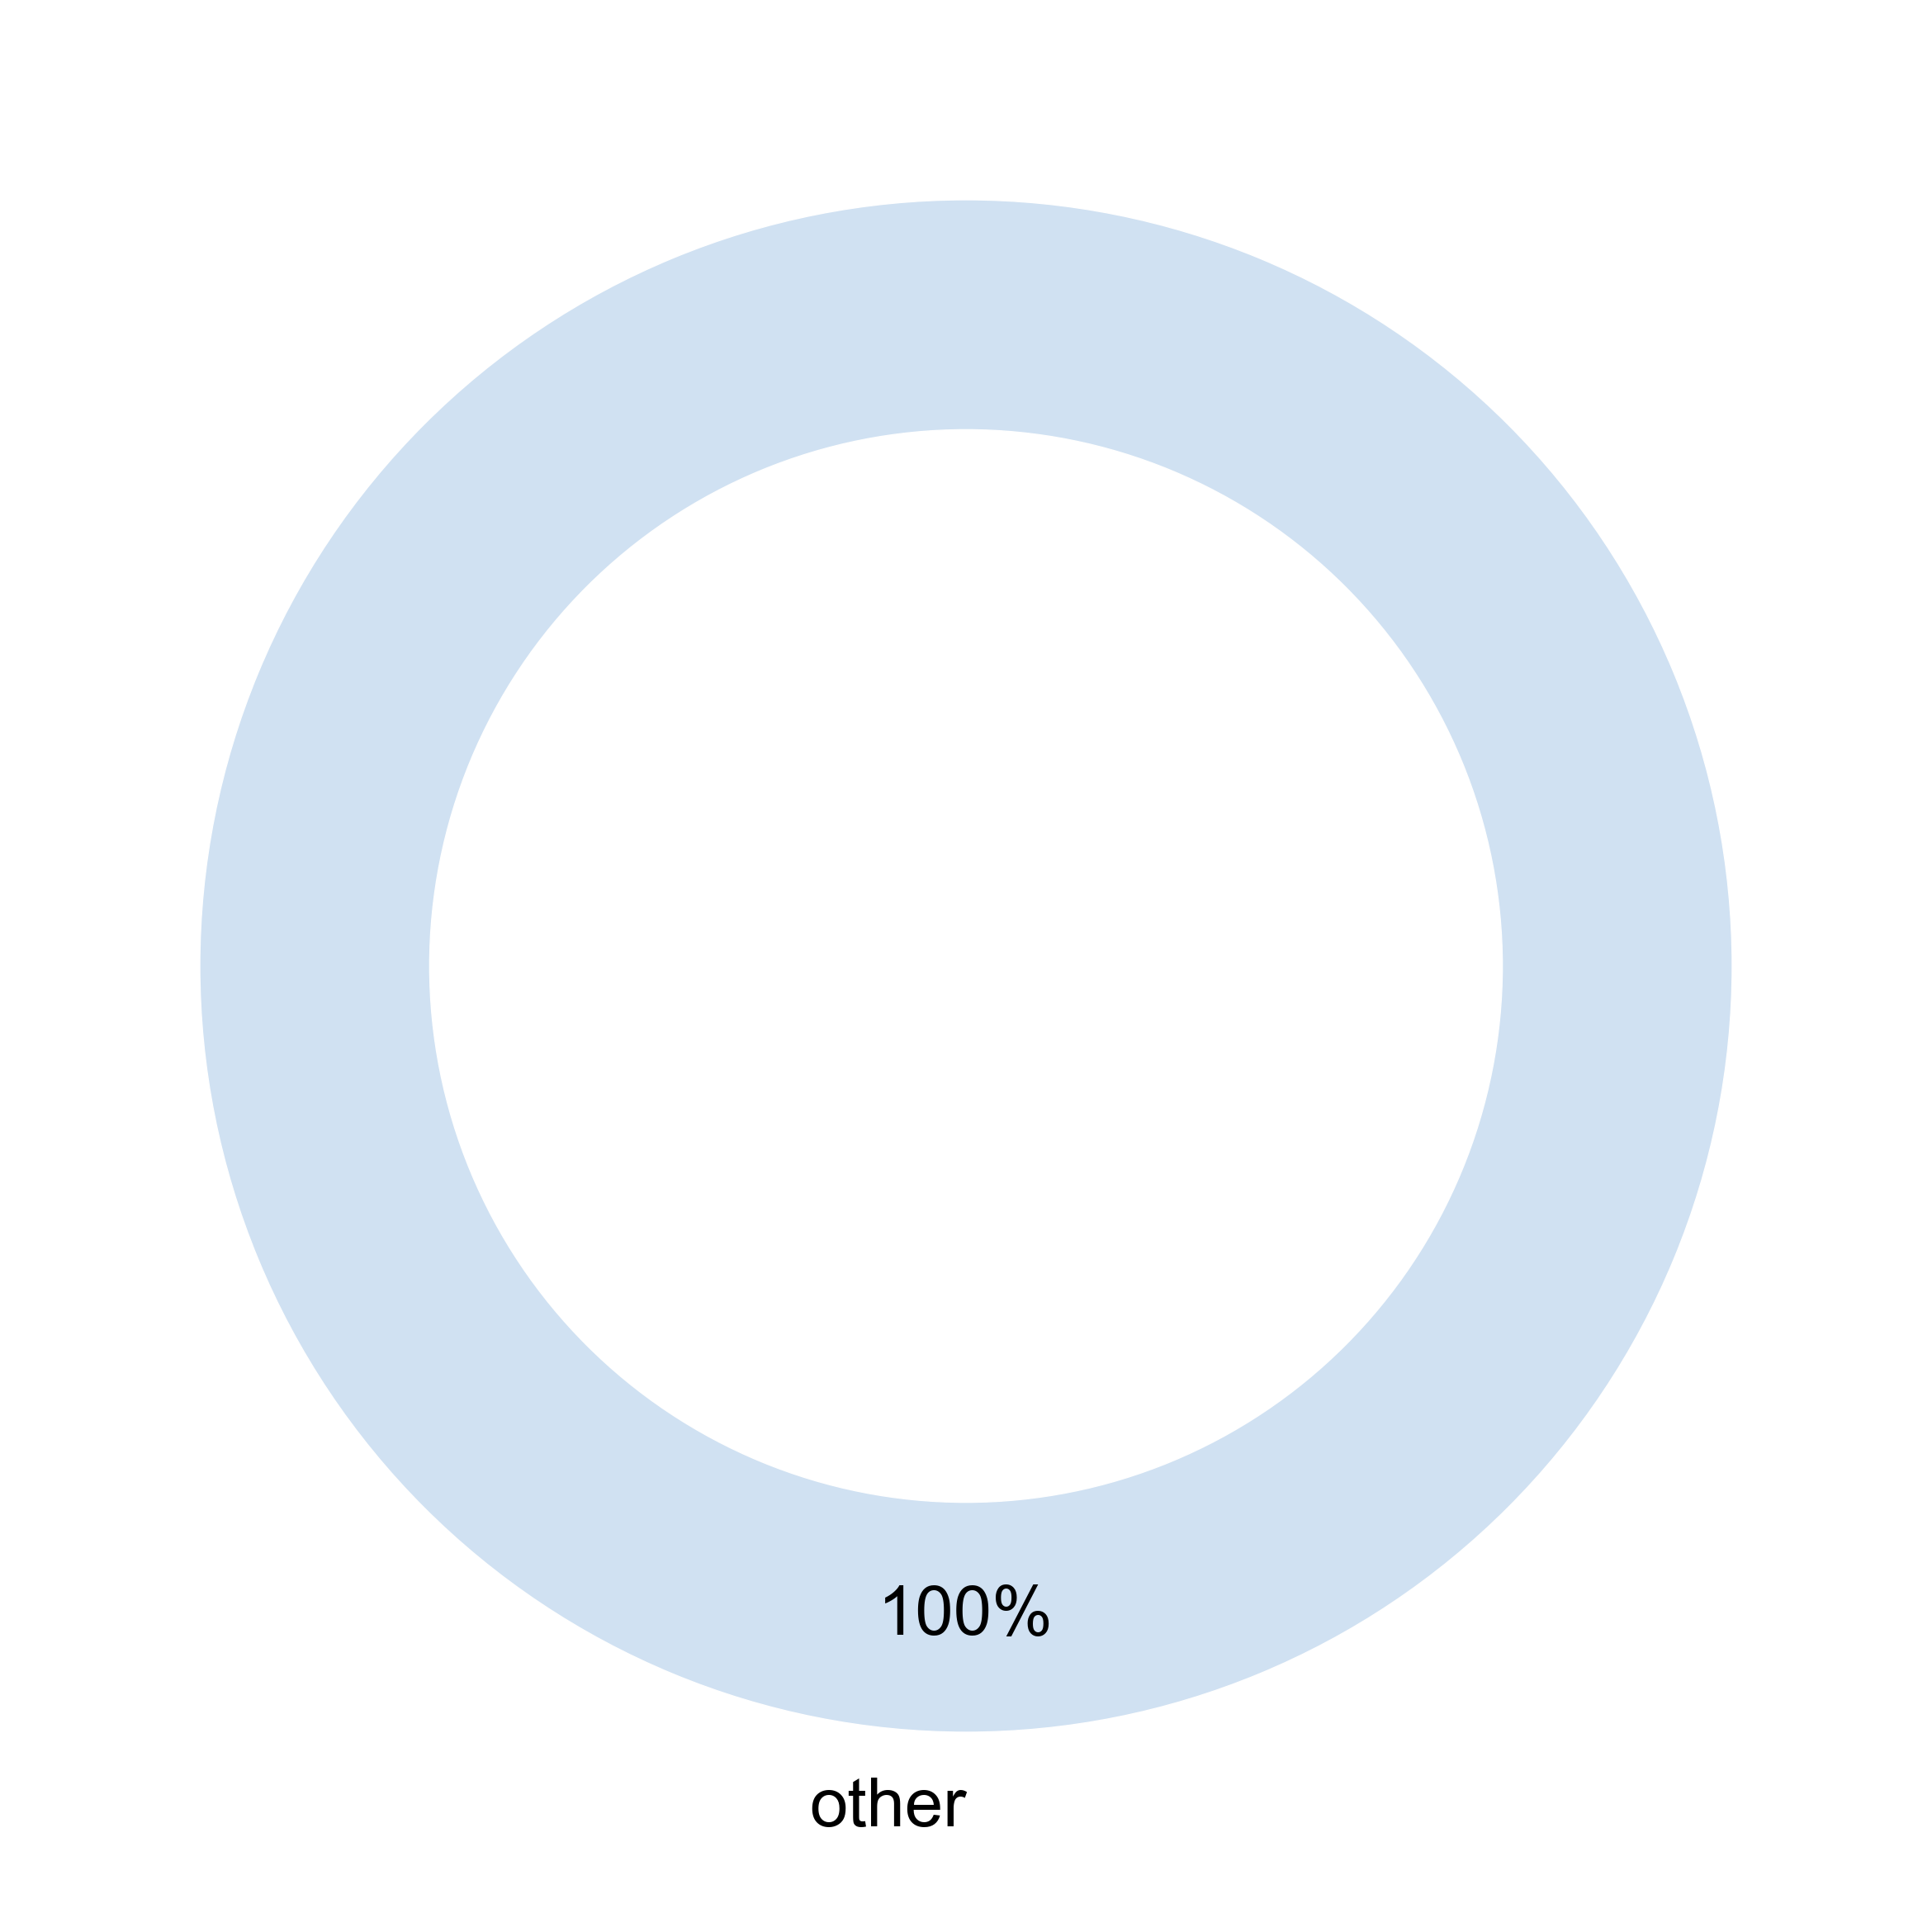

In [7]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 60}

plt.rc('font', **font)

cmap = plt.get_cmap("Blues")
outer_colors = cmap(np.linspace(0.2, 0.7, len(pie_res)))

fig = plt.figure(figsize=(25, 25))
plt.pie(pie_res['N'], labels=pie_res['context'], colors=outer_colors, autopct='%1.0f%%', pctdistance=0.85, startangle=90, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.tight_layout()
#plt.show()
plt.savefig('1.png')

In [8]:
pie_cat=df.groupby(['category']).count()
total = pie_cat['N'].sum()
pie_cat_res = pie_cat[['N']].loc[pie_cat['N']>2].reset_index()
total_more3 = pie_cat_res['N'].sum()

new_row = {'category': 'другое', 'N': (total-total_more3)}
pie_cat_res = pie_cat_res.sort_values(by=['N'], ascending=False).append(new_row, ignore_index=True)

pie_cat_res.head(100)

/var/folders/jp/0hf26ng557jf9w1v091pbcz00000gn/T/ipykernel_59741/222724039.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_cat_res = pie_cat_res.sort_values(by=['N'], ascending=False).append(new_row, ignore_index=True)


,category,N
0,другое,1


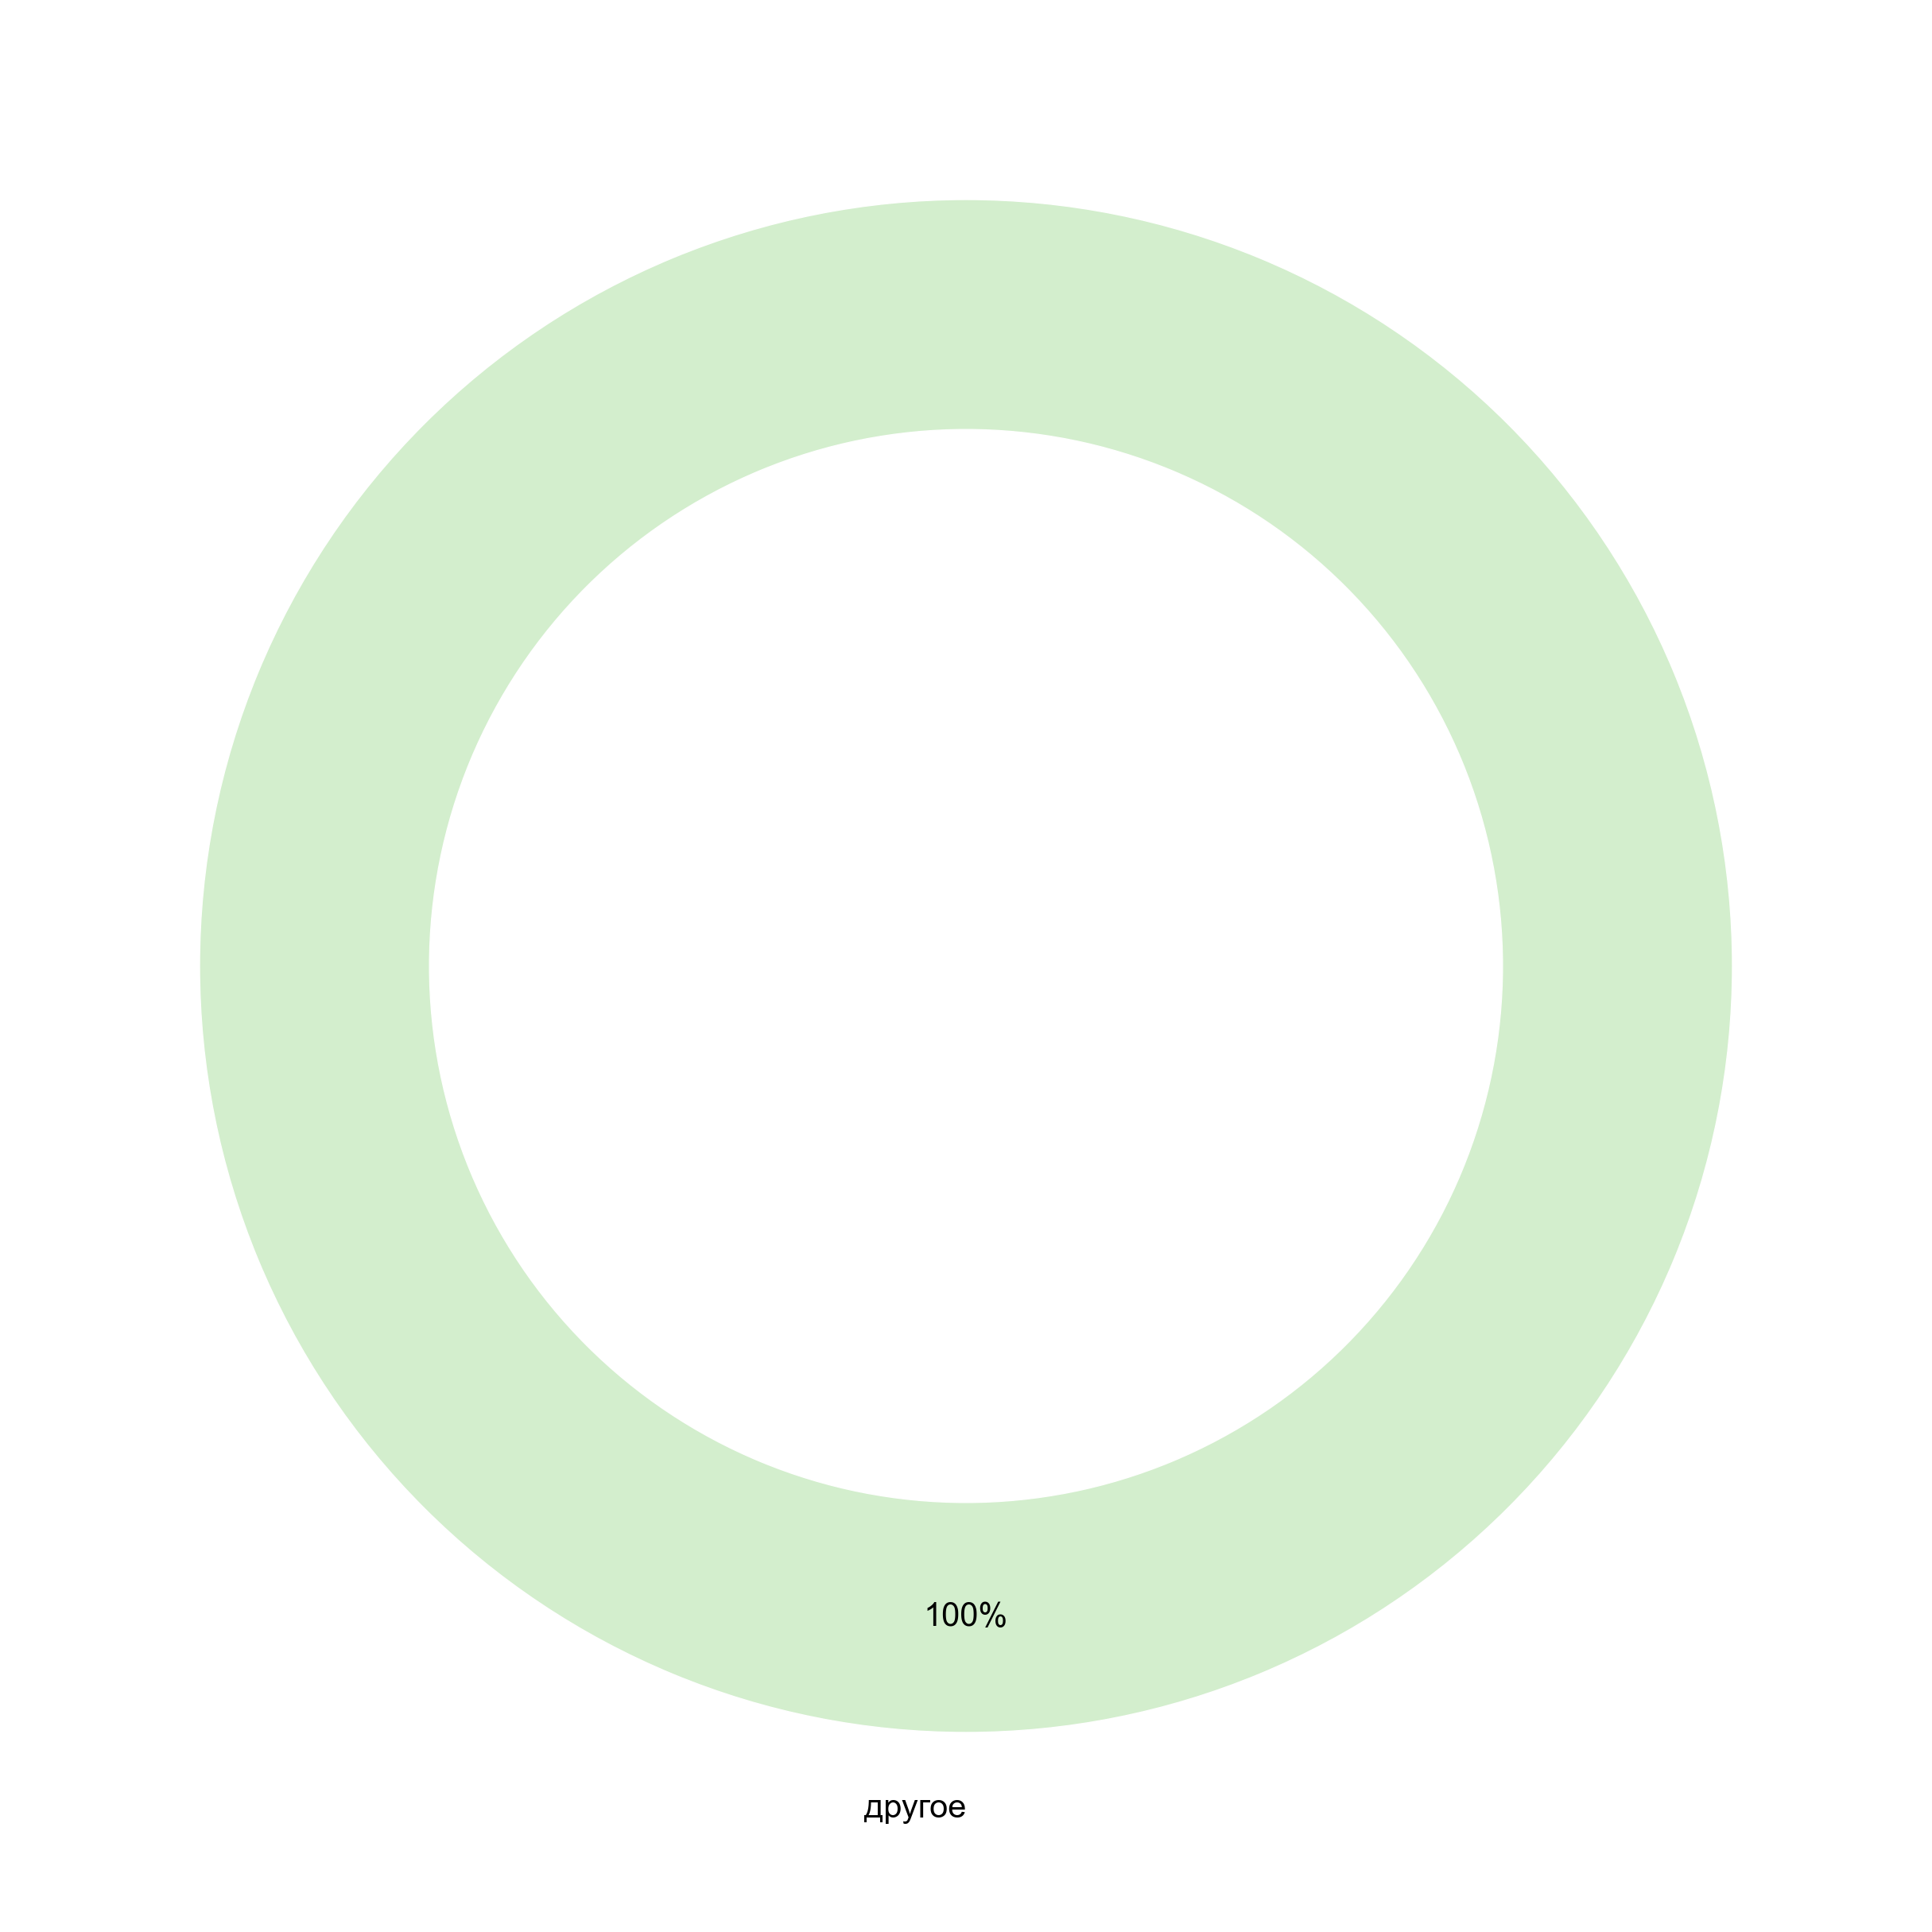

In [9]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

cmap = plt.get_cmap("Greens")
outer_colors = cmap(np.linspace(0.2, 0.7, len(pie_cat_res)))

fig = plt.figure(figsize=(25, 25))
plt.pie(pie_cat_res['N'], labels=pie_cat_res['category'], colors=outer_colors, autopct='%1.0f%%', pctdistance=0.85, startangle=90, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.tight_layout()
plt.savefig('2.png')